Import Libraries

In [27]:
import numpy as np 
import pandas as pd  
import numpy as np
import math
import  matplotlib.pyplot  as  plt 
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
#% matplotlib inline

In [28]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

Exploratory Data Analysis

In [29]:
"""_
For all new users we have saved their different coordinates and their average speed_
for our model to be more intelligent, it needs more data. Reason why we have several users 

    """

'_\nFor all new users we have saved their different coordinates and their average speed_\nfor our model to be more intelligent, it needs more data. Reason why we have several users \n\n    '

In [30]:
#df1 = pd.read_excel((r'user1Datasets.xlsx'))
df2 = pd.read_excel((r'user2Datasets.xlsx'))
#df3 = pd.read_excel((r'user3Datasets.xlsx'))
#df4 = pd.read_excel((r'user4Datasets.xlsx'))
#df5 = pd.read_excel((r'user5Datasets.xlsx'))

## concatenating  of the different users' dataframes along rows
df = pd.concat([df2], axis=0)



In [31]:
df.head(10)

,latitudeStart,longitudeStart,latitudeEnd,longitudeEnd,averageSpeed
0,51.452831,7.249331,51.429795,6.786755,3.51
1,51.452831,7.249327,51.429783,6.786729,4.01
2,51.452826,7.249328,51.429749,6.786717,4.51
3,51.452824,7.249328,51.429746,6.786700,5.01
4,51.452824,7.249319,51.429757,6.786722,3.63
5,51.452827,7.249324,51.429761,6.786727,4.13
6,51.452827,7.249324,51.429737,6.786676,4.63
7,51.452827,7.249320,51.429735,6.786676,5.13
8,51.452829,7.249322,51.429734,6.786676,3.75
9,51.452829,7.249322,51.429737,6.786676,4.25


In [32]:
df.shape

(176, 5)

In [33]:
print(df.describe().round(2).T)

                count   mean   std    min    25%    50%    75%    max
latitudeStart   176.0  51.47  0.04  51.43  51.45  51.45  51.51  51.53
longitudeStart  176.0   7.21  0.25   6.79   7.25   7.25   7.42   7.42
latitudeEnd     176.0  51.47  0.04  51.43  51.45  51.45  51.51  51.53
longitudeEnd    176.0   7.21  0.25   6.79   7.25   7.25   7.42   7.42
averageSpeed    176.0   4.38  1.52   1.35   3.74   4.39   5.16   8.42


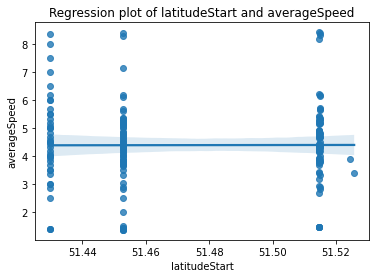

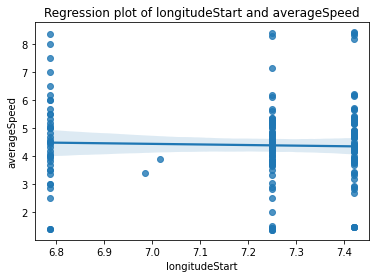

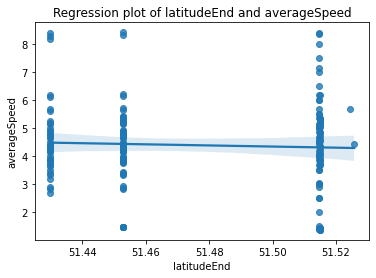

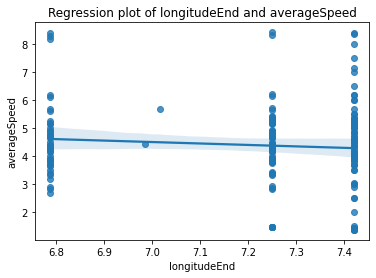

In [34]:
#This time, we will use Seaborn, an extension of Matplotlib which Pandas uses under the hood when plotting:
import seaborn as sns # Convention alias for Seaborn

variables = ['latitudeStart', 'longitudeStart', 'latitudeEnd','longitudeEnd']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='averageSpeed', data=df).set(title=f'Regression plot of {var} and averageSpeed');

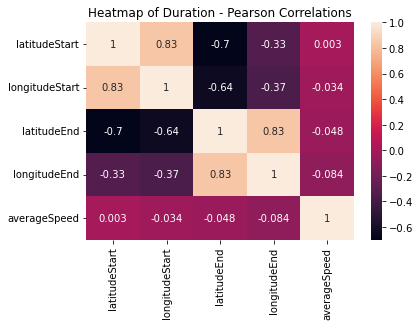

In [35]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Duration - Pearson Correlations');

Preparing the Data

In [36]:

y = df['averageSpeed']
X = df[['latitudeStart', 'longitudeStart',
       'latitudeEnd', 'longitudeEnd']]

In [37]:
#To be able to have the same results, or reproducible results, we define a constant called SEED
SEED = 42

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

#Training the Model

In [39]:

X.shape 

(176, 4)

In [40]:
#we need to fit the line to our data, we will do that by using the .fit() method
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
#After fitting the model and finding our optimal solution, we also look at the intercept:
regressor.intercept_


-906.3473638574391

In [42]:
#And at the coefficients of the features
regressor.coef_

array([ 8.67156338, -1.13013351,  9.39636548, -1.55782658])

In [43]:
#Those four values are the coefficients for each of our features in the same order as we have them in our X data.
feature_names = X.columns
feature_names


Index(['latitudeStart', 'longitudeStart', 'latitudeEnd', 'longitudeEnd'], dtype='object')

In [44]:
#we assign our column names to a feature_names variable, and our coefficients to a model_coefficients variable. After that, we create a dataframe with our features as an index and our coefficients as column values called coefficients_df

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                Coefficient value
latitudeStart            8.671563
longitudeStart          -1.130134
latitudeEnd              9.396365
longitudeEnd            -1.557827


#Making Predictions with the Regression Model

In [45]:
#The y_pred variable contains all the predicted values for the input values in the X_test
y_pred = regressor.predict(X_test)

In [46]:
#Now, that we have our test predictions, we can better compare them with the actual output values for X_test by organizing them in a DataFrameformat

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


     Actual  Predicted
19    3.800   4.316897
45    4.340   4.126819
139   5.280   4.155693
30    3.860   4.127483
67    6.490   4.449709
16    8.300   4.317026
119   3.990   4.156048
172   3.390   5.248074
109   5.630   4.156069
140   3.390   4.155696
24    1.354   4.127531
160   4.900   4.660002
41    4.220   4.127484
118   5.370   4.156041
15    6.100   4.316652
111   8.330   4.156040
113   3.330   4.156018
82    4.070   4.450198
9     4.250   4.316546
114   3.830   4.156088
18    3.300   4.317212
66    5.990   4.449738
60    2.990   4.449973
167   5.190   4.659678
169   6.190   4.659804
150   5.130   4.155809
117   5.330   4.156067
65    5.490   4.449724
90    4.310   4.452032
55    5.140   4.127087
29    3.660   4.127507
127   4.420   4.155717
144   5.390   4.155725
31    4.360   4.127454
12    3.870   4.316926
42    4.720   4.127461


Evaluating the Model

In [47]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.05
Mean squared error: 2.05
Root mean squared error: 1.43


In [48]:
##We can see that the value of the RMSE is 2.08, 
# which means that our model might get its prediction wrong by adding or subtracting 2.5 from the actual value. 
# It would be better to have this error closer to 0, and 2.08 is a small number - 
# this indicates that our model might be predicting very well.

In [49]:

regressor.score(X_train, y_train)

0.020141737479684063

In [50]:
#import joblib
import pickle


In [52]:

pickle.dump(regressor, open("model.pkl", "wb"))

#joblib.dump(results, "results.pkl")

In [57]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[51.4528259
, 7.249321
,  51.4297554
, 6.7866744
]]))

[4.31669277]


In [61]:
import h5py


In [ ]:
final  = h5py.File('model.pkl','rb')

In [62]:
resultat = pd.HDFStore("resultat.h5", "w", driver="H5FD_CORE")

In [63]:
print (resultat)

<class 'pandas.io.pytables.HDFStore'>
File path: resultat.h5



In [64]:
resultat.keys()

[]